In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
from tensorflow.keras import layers, utils, models
import warnings
warnings.filterwarnings('ignore')

In [2]:
def loading_preprocss(path):
    img_list = []
    for img_path in os.listdir(path):
        img = cv2.imread(path + '/' + img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (225,225))
        img = img / 255
        img_list.append(img)
    return img_list

In [3]:
train_NORMAL = loading_preprocss('chest_xray/train/NORMAL')
train_PNEUMONIA = loading_preprocss('chest_xray/train/PNEUMONIA')
train_list = train_NORMAL + train_PNEUMONIA
train_labels = [0]*len(train_NORMAL) + [1]*len(train_PNEUMONIA)

print('length of inputs', len(train_list))
print('length of outputs', len(train_labels))

length of inputs 5216
length of outputs 5216


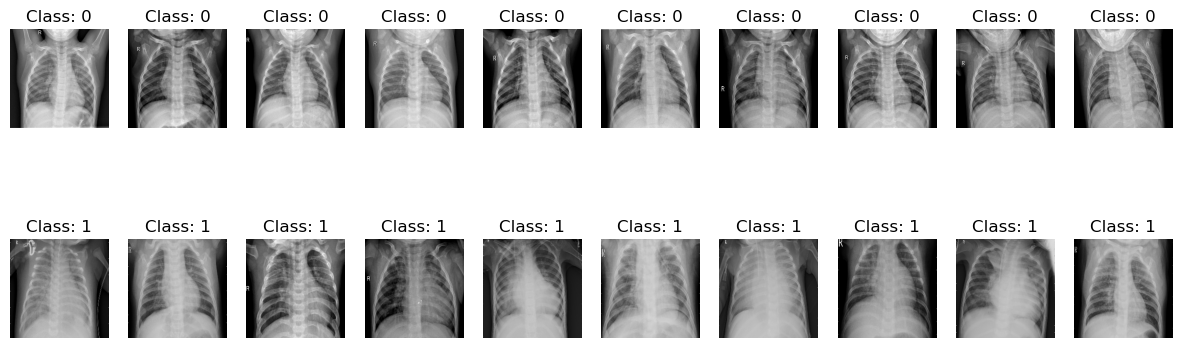

In [4]:
num_samples_to_display = 10

# Filter images from class 0 and class 1
class_0_indices = [i for i, label in enumerate(train_labels) if label == 0]
class_1_indices = [i for i, label in enumerate(train_labels) if label == 1]

class_0_images = [train_list[i] for i in class_0_indices[:num_samples_to_display]]
class_1_images = [train_list[i] for i in class_1_indices[:num_samples_to_display]]

# Set up subplots
fig, axs = plt.subplots(2, num_samples_to_display, figsize=(15, 5))

# Display the selected number of sample images from both classes
for i in range(num_samples_to_display):
    axs[0, i].imshow(class_0_images[i])
    axs[0, i].set_title(f'Class: 0')
    axs[0, i].axis('off')

    axs[1, i].imshow(class_1_images[i])
    axs[1, i].set_title(f'Class: 1')
    axs[1, i].axis('off')

plt.show()

In [5]:
test_NORMAL = loading_preprocss('chest_xray/test/NORMAL')
test_PNEUMONIA = loading_preprocss('chest_xray/test/PNEUMONIA')
test_list = test_NORMAL + test_PNEUMONIA
test_labels = [0]*len(test_NORMAL) + [1]*len(test_PNEUMONIA)

print('length of inputs', len(test_list))
print('length of outputs', len(test_labels))

length of inputs 624
length of outputs 624


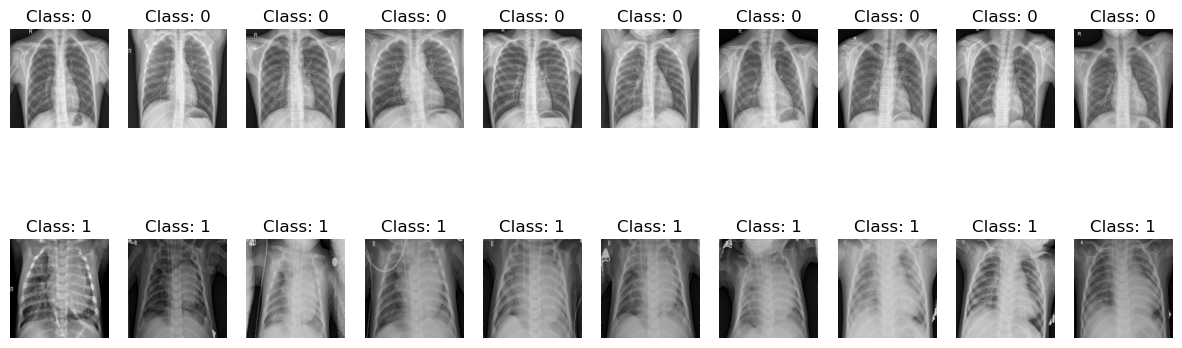

In [6]:
num_samples_to_display = 10

# Filter images from class 0 and class 1
class_0_indices = [i for i, label in enumerate(test_labels) if label == 0]
class_1_indices = [i for i, label in enumerate(test_labels) if label == 1]

class_0_images = [test_list[i] for i in class_0_indices[:num_samples_to_display]]
class_1_images = [test_list[i] for i in class_1_indices[:num_samples_to_display]]

# Set up subplots
fig, axs = plt.subplots(2, num_samples_to_display, figsize=(15, 5))

# Display the selected number of sample images from both classes
for i in range(num_samples_to_display):
    axs[0, i].imshow(class_0_images[i])
    axs[0, i].set_title(f'Class: 0')
    axs[0, i].axis('off')

    axs[1, i].imshow(class_1_images[i])
    axs[1, i].set_title(f'Class: 1')
    axs[1, i].axis('off')

plt.show()

In [7]:
X_train = np.array(train_list)
X_test = np.array(test_list)

In [8]:
y_train = utils.to_categorical(train_labels, num_classes=2)
y_test = utils.to_categorical(test_labels, num_classes=2)

In [9]:
X_train[0].shape

(225, 225, 3)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', strides = 1, activation='relu', input_shape=(X_train[0].shape)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', strides = 1, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', strides = 1, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation= 'relu'))
model.add(layers.Dense(32, activation= 'relu'))
model.add(layers.Dense(2, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 32)        0

In [11]:
y_test.shape

(624, 2)

In [12]:
X_test.shape

(624, 225, 225, 3)

In [13]:
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics =['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
163/163 [==============================] - 288s 2s/step - loss: 0.2927 - accuracy: 0.8702 - val_loss: 1.0170 - val_accuracy: 0.7147
Epoch 2/10
163/163 [==============================] - 283s 2s/step - loss: 0.1075 - accuracy: 0.9603 - val_loss: 1.2112 - val_accuracy: 0.7115
Epoch 3/10
163/163 [==============================] - 282s 2s/step - loss: 0.0738 - accuracy: 0.9718 - val_loss: 1.0600 - val_accuracy: 0.7853
Epoch 4/10
163/163 [==============================] - 282s 2s/step - loss: 0.0613 - accuracy: 0.9789 - val_loss: 1.7349 - val_accuracy: 0.7692
Epoch 5/10
163/163 [==============================] - 281s 2s/step - loss: 0.0543 - accuracy: 0.9808 - val_loss: 1.5557 - val_accuracy: 0.7548
Epoch 6/10
163/163 [==============================] - 281s 2s/step - loss: 0.0319 - accuracy: 0.9885 - val_loss: 2.0620 - val_accuracy: 0.7500
Epoch 7/10
163/163 [==============================] - 280s 2s/step - loss: 0.0350 - accuracy: 0.9850 - val_loss: 2.4846 - val_accuracy: 0.6907

In [16]:
preds = model.predict(X_test)

20/20 [==============================] - 7s 363ms/step


In [17]:
PREDS = np.argmax(np.round(preds), axis=1)

In [18]:
evaluation = model.evaluate(X_test, y_test)
print(f"Test Loss: {evaluation[0]}")
print(f"Test Accuracy: {evaluation[1]}")

20/20 [==============================] - 7s 362ms/step - loss: 2.0327 - accuracy: 0.7596
Test Loss: 2.0326550006866455
Test Accuracy: 0.7596153616905212


In [19]:
from sklearn.metrics import confusion_matrix
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 86 148]
 [  2 388]]


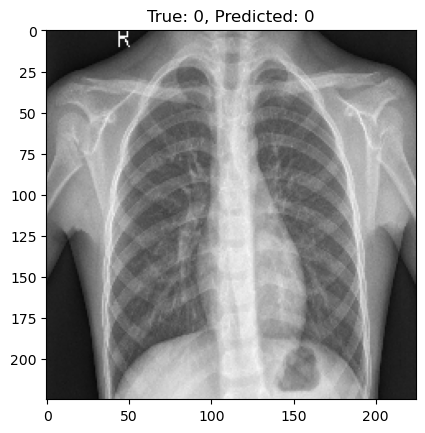

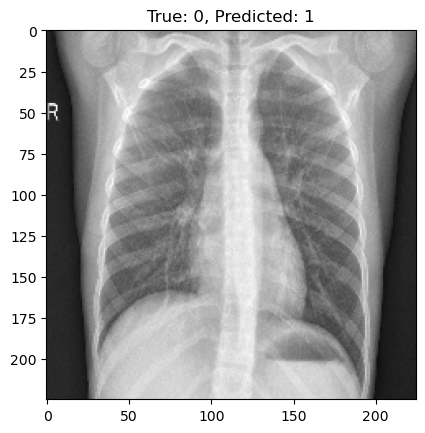

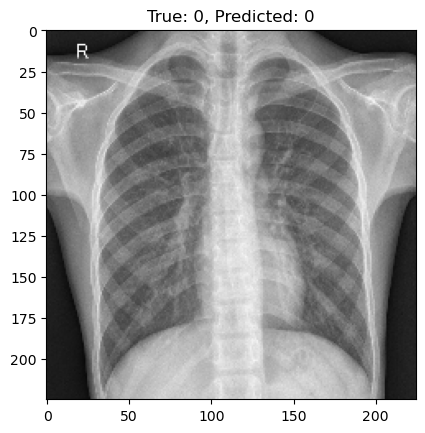

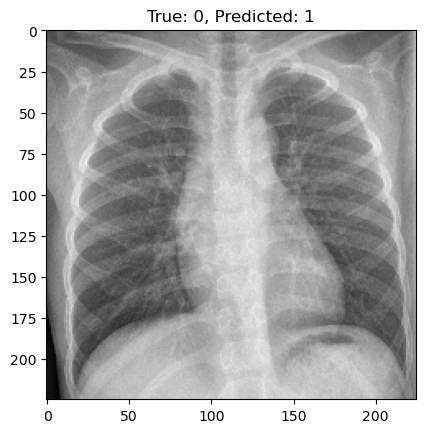

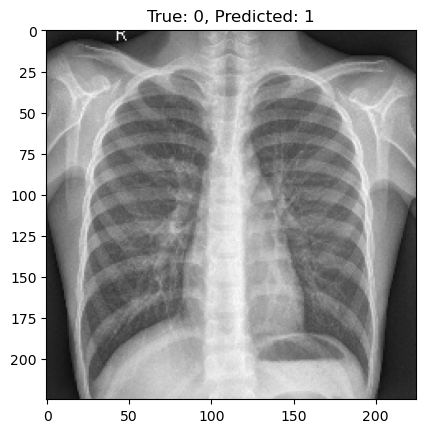

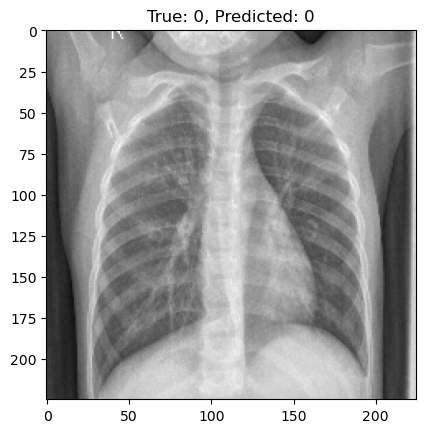

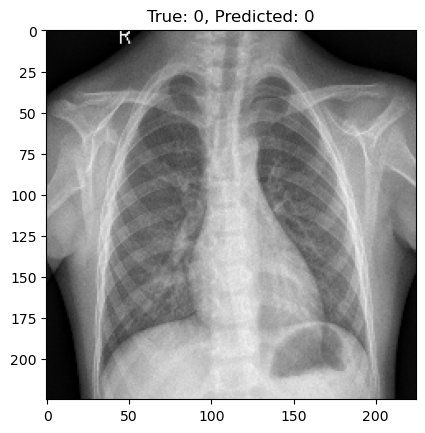

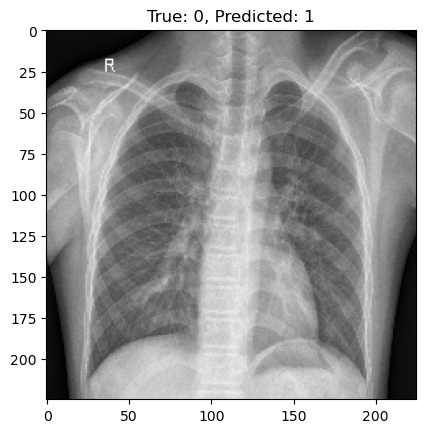

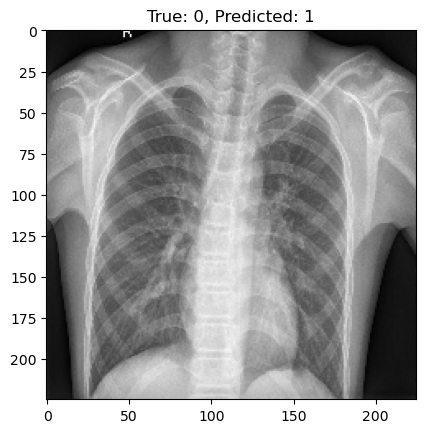

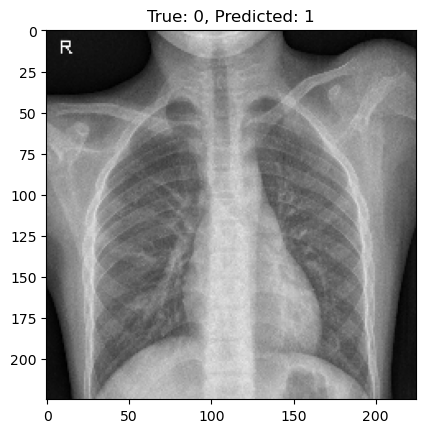

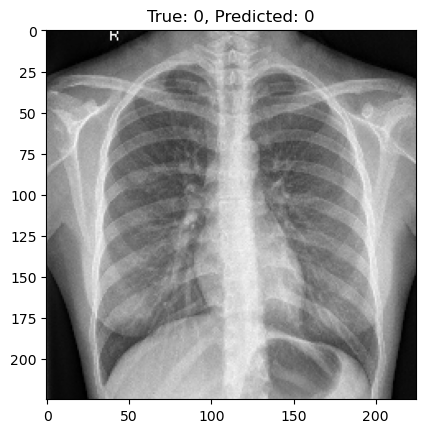

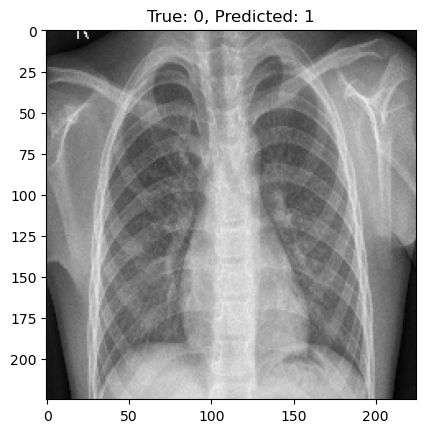

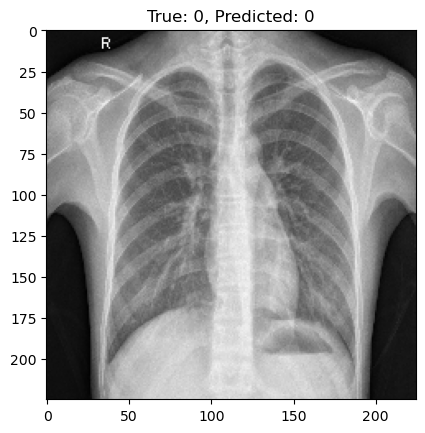

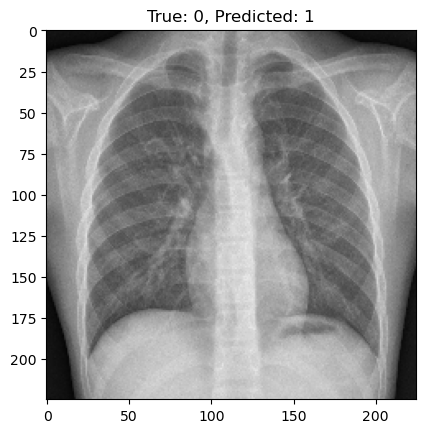

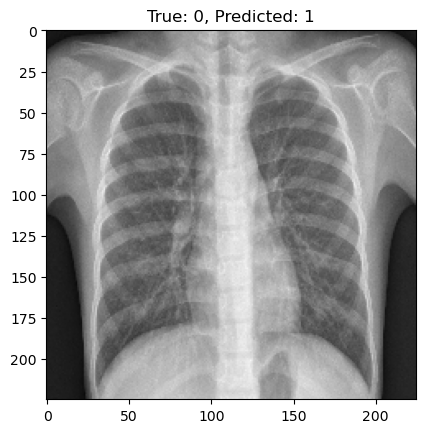

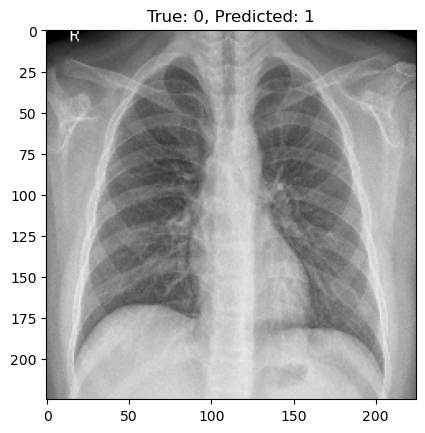

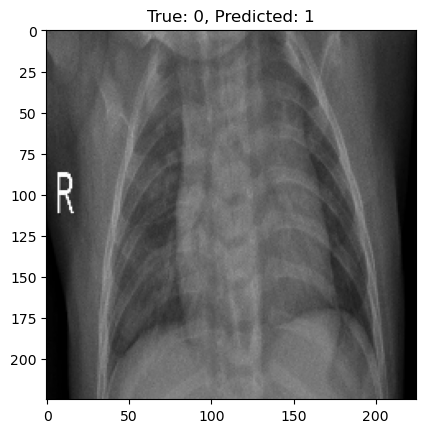

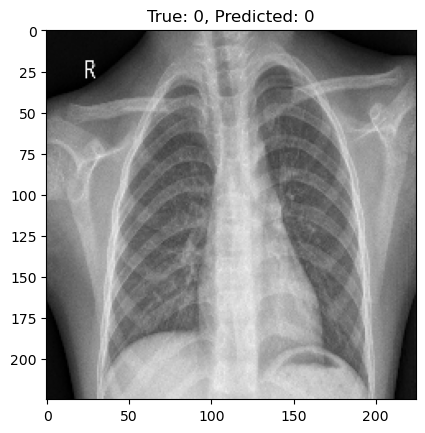

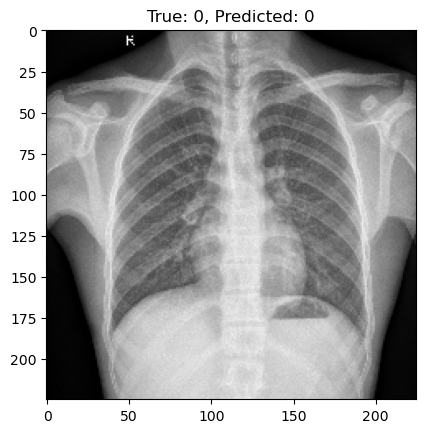

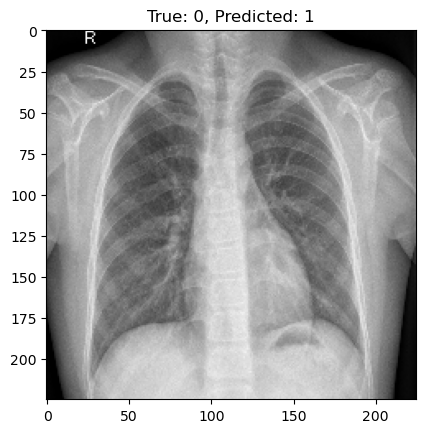

In [21]:
num_samples_to_display = 20
# Visualize some of the predictions
for i in range(num_samples_to_display):
    plt.imshow(X_test[i])
    true_class = np.argmax(y_test[i])
    predicted_class = np.argmax(preds[i])
    plt.title(f'True: {true_class}, Predicted: {predicted_class}')
    plt.show()

In [22]:
model.save('X_ray.pb')
print('saved')

INFO:tensorflow:Assets written to: X_ray.pb\assets


INFO:tensorflow:Assets written to: X_ray.pb\assets


saved
